In [20]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [10]:
df = pd.DataFrame({'국어': [90,88,92], '수학':[87, 90, 95], '영어':[94,86, 89]}, index=['고길동','김둘리','이하늬'])

def score(df):
    return math.ceil((df['수학']+df['영어']+df['국어'])/3)

print(df.head())
#모든 점수에 +5를 하고 싶은 때
df.apply(lambda x: x+5)

     국어  수학  영어
고길동  90  87  94
김둘리  88  90  86
이하늬  92  95  89


,국어,수학,영어
고길동,95,92,99
김둘리,93,95,91
이하늬,97,100,94


In [12]:
items = pd.Series([1,4,10,5,9,10,4,10,5])

print(items.unique())  #중복성이 제거된 유일한 값들만 반환
print(items.value_counts()) #중복된 값들을 카운트 ex)치폴레 무엇이 가장 많이 팔렸는지 

[ 1  4 10  5  9]
10    3
5     2
4     2
9     1
1     1
dtype: int64


In [26]:
file_path = "C:/Users/MoonJu/Documents/Python/juhyeokmoon.github.io-1/chipotle.tsv"
chipo = pd.read_csv(file_path, sep='\t')

chipo['order_id'] = chipo['order_id'].astype(str)
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.info()
chipo[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   object 
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [14]:
#가장 많이 주문한 아이템 Top 10을 출력
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(),1):
    print("Top",idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [16]:
#아이템별 주문 개수를 출력
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [19]:
#아이템별 주문 종량 계산
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

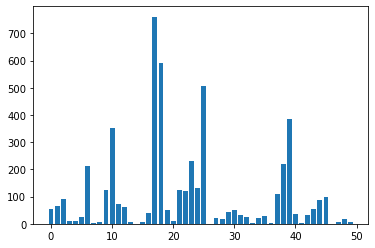

In [21]:
item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.show()

In [39]:
#한 주문에 10달러 이상 지불한 id를 출력
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >=10]
print(results[0:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


In [57]:
#각 아이템 가격을 계산
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by = 'item_price', ascending=False).head()

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99


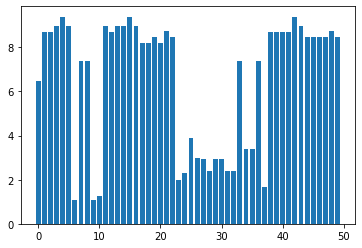

In [66]:
item_name_list = price_per_item.index.tolist()
item_price = price_per_item['item_price'].tolist()
x_pos = np.arange(len(item_name_list))
plt.bar(x_pos, item_price, align='center')
plt.show()